/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/40760915

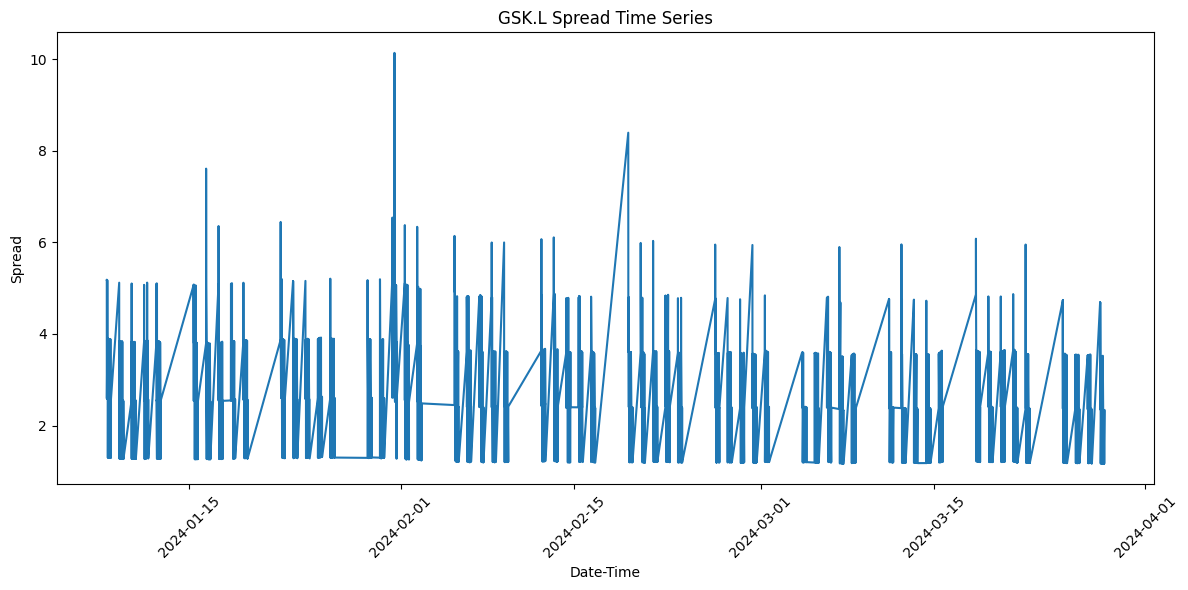

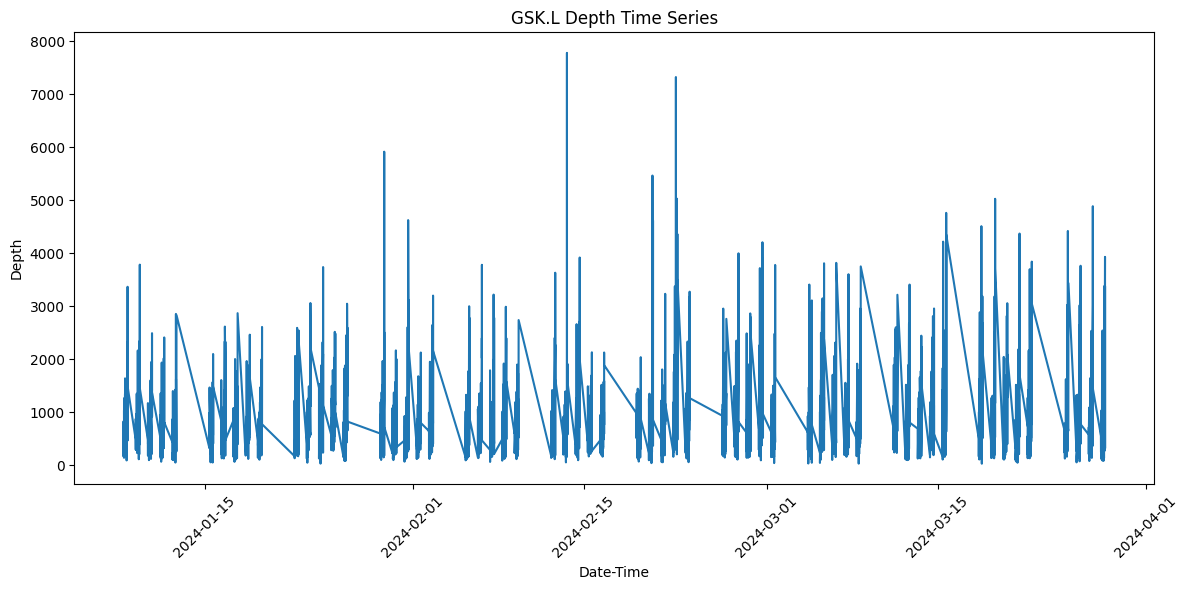

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/40760915

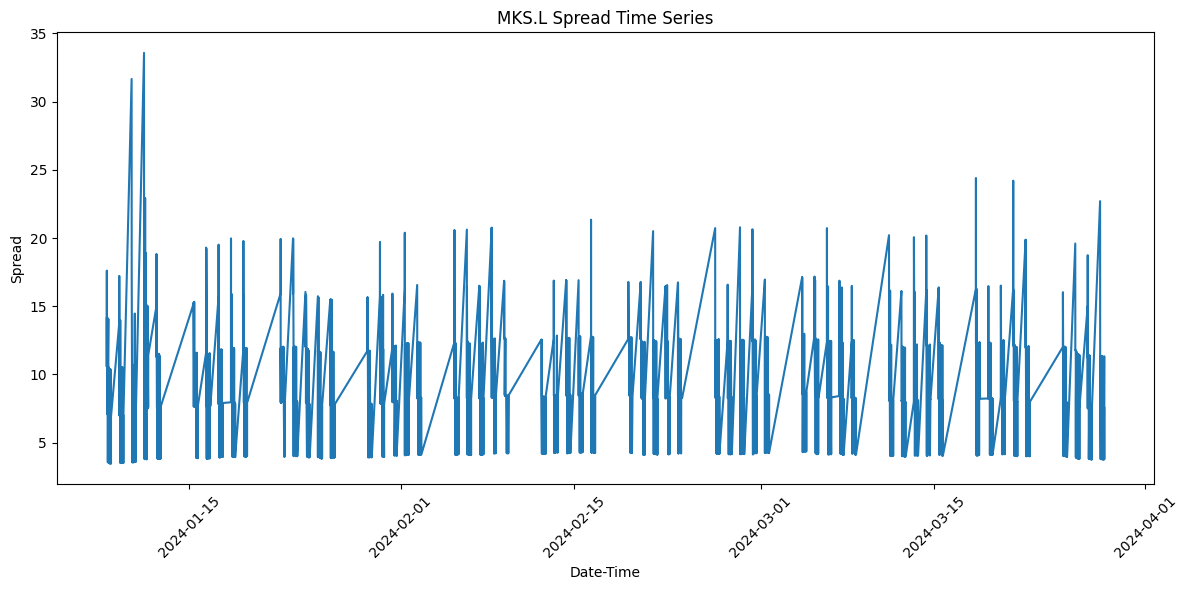

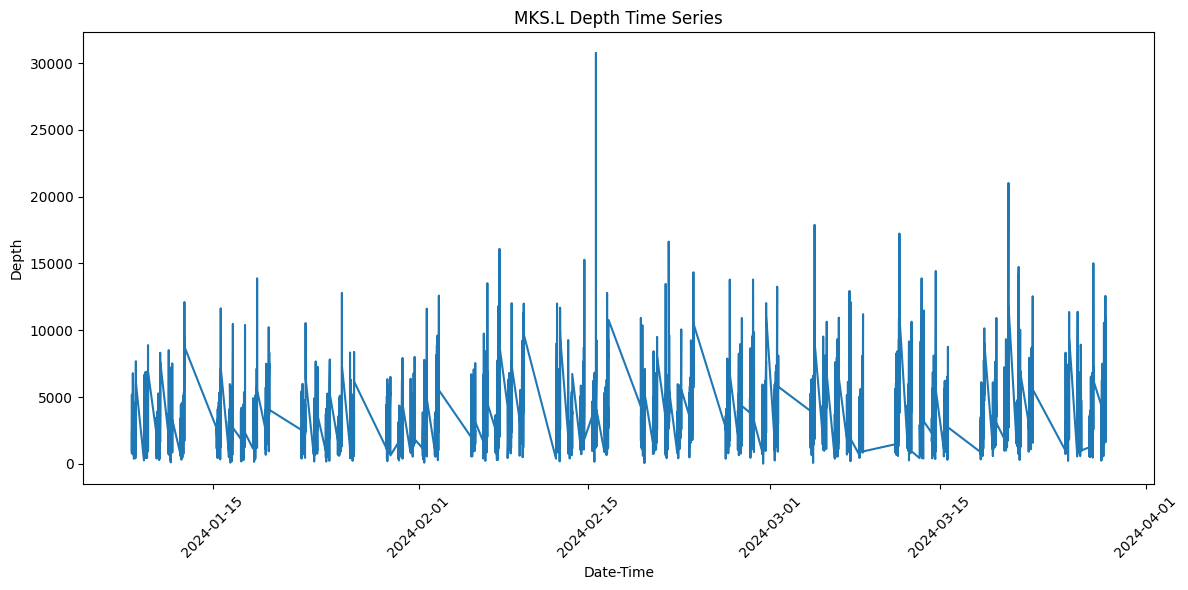

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/4076091586.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/40760915

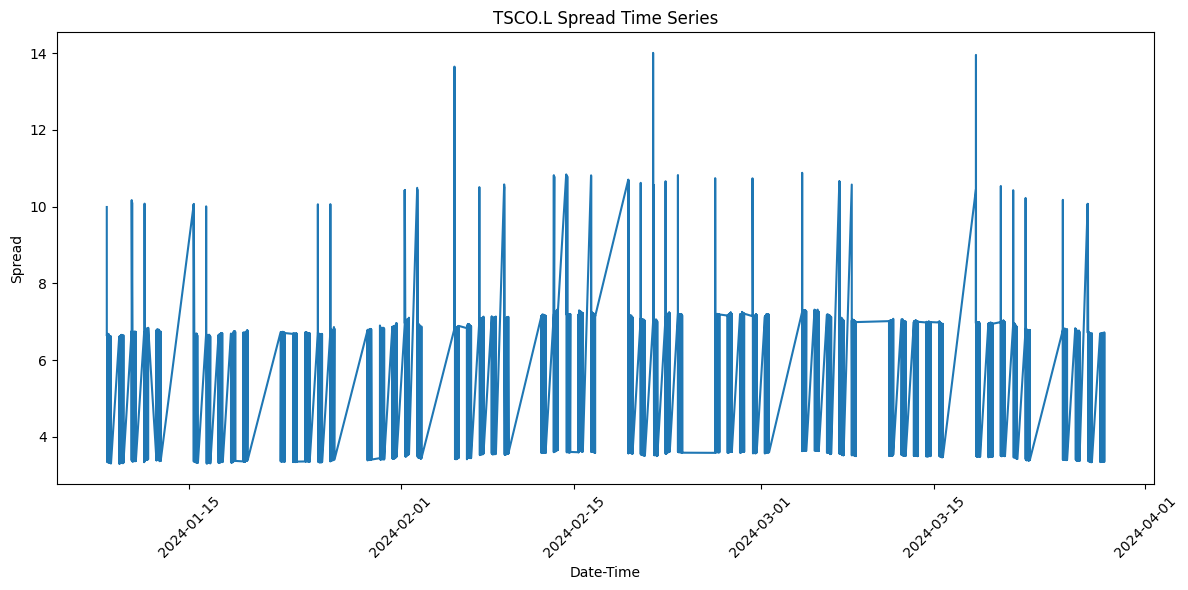

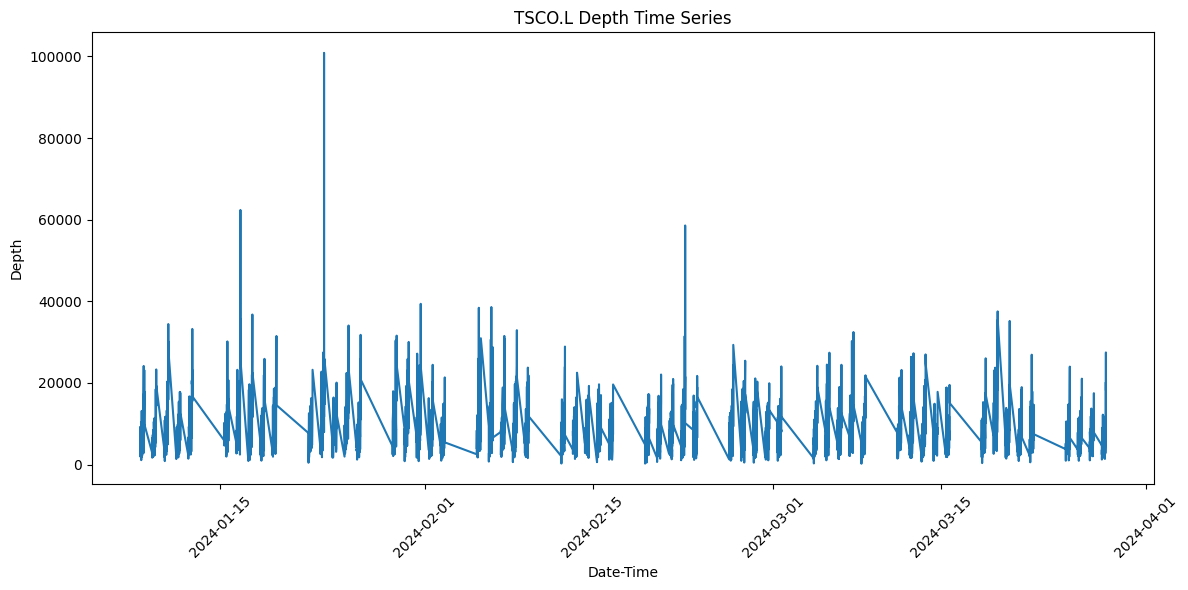

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
file_path = '/Users/mahinbindra/Downloads/SMM921_trading_data_2024.csv'
data = pd.read_csv(file_path)

# Convert the Date-Time column to datetime format
data['Date-Time'] = pd.to_datetime(data['Date-Time'])

# Choose specific stocks
selected_stocks = ['GSK.L', 'MKS.L', 'TSCO.L']

# Iterate over each selected stock to plot spread and depth time series
for myStock in selected_stocks:
    stock_data = data[data['Stock'] == myStock]
    
    # Calculate mid, spread, and depth
    stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
    stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
    stock_data['depth'] = 0.5 * (stock_data['Close Ask Size'] + stock_data['Close Bid Size'])

    # Filter out rows with non-positive spread
    stock_data = stock_data[stock_data['spread'] > 0]

    # Filter observations before 8:15 and after 16:25 in each day
    stock_data = stock_data[(stock_data['Date-Time'].dt.hour >= 8) & (stock_data['Date-Time'].dt.minute >= 15)]
    stock_data = stock_data[(stock_data['Date-Time'].dt.hour <= 16) & (stock_data['Date-Time'].dt.minute <= 25)]

    # Plot the spread time series
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date-Time'], stock_data['spread'])
    plt.title(f"{myStock} Spread Time Series")
    plt.xlabel('Date-Time')
    plt.ylabel('Spread')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()

    # Plot the depth time series
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date-Time'], stock_data['depth'])
    plt.title(f"{myStock} Depth Time Series")
    plt.xlabel('Date-Time')
    plt.ylabel('Depth')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()


In [13]:
import numpy as np
import pandas as pd

# Load the data
file_path = '/Users/mahinbindra/Downloads/SMM921_trading_data_2024.csv'
data = pd.read_csv(file_path)

# Convert the Date-Time column to datetime format
data['Date-Time'] = pd.to_datetime(data['Date-Time'])

# Choose specific stocks
selected_stocks = ['GSK.L', 'MKS.L', 'TSCO.L']

# Initialize a dictionary to store the statistics
stats = {}

# Iterate over each selected stock to calculate statistics
for myStock in selected_stocks:
    stock_data = data[data['Stock'] == myStock]
    
    # Calculate mid, spread, and depth
    stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
    stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
    stock_data['depth'] = 0.5 * (stock_data['Close Ask Size'] + stock_data['Close Bid Size'])

    # Filter out rows with non-positive spread
    stock_data = stock_data[stock_data['spread'] > 0]

    # Calculate statistics for spread
    spread_stats = stock_data['spread'].describe()
    depth_stats = stock_data['depth'].describe()

    # Store the statistics in the dictionary
    stats[myStock] = {
        'Mean Spread': spread_stats['mean'],
        'Std Dev Spread': spread_stats['std'],
        'Min Spread': spread_stats['min'],
        'Max Spread': spread_stats['max'],
        'Median Spread': spread_stats['50%'],
        'Mean Depth': depth_stats['mean'],
        'Std Dev Depth': depth_stats['std'],
        'Min Depth': depth_stats['min'],
        'Max Depth': depth_stats['max'],
        'Median Depth': depth_stats['50%']
    }

# Convert the dictionary to a DataFrame
stats_df = pd.DataFrame(stats)

# Transpose the DataFrame for better readability
stats_df = stats_df.transpose()

# Print the DataFrame
print(stats_df)


        Mean Spread  Std Dev Spread  Min Spread   Max Spread  Median Spread   
GSK.L      4.840350       39.216976    1.164483  3021.207178       2.418380  \
MKS.L     17.634668      146.803182    3.442933  3032.629559       8.264463   
TSCO.L     8.411079       53.638869    3.297609  1733.524355       3.643651   

         Mean Depth  Std Dev Depth  Min Depth  Max Depth  Median Depth  
GSK.L    978.083931    1933.580493       10.0    62359.0         689.0  
MKS.L   3455.224525    3498.957253        5.5   177570.5        2832.5  
TSCO.L  8744.685682    6193.759232       94.0   215544.0        7580.5  


/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/957229999.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/957229999.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/957229999.

In [14]:
# Calculate summary statistics for spreads and depth for the entire time-span
all_data = data.copy()

# Calculate mid, spread, and depth
all_data['mid'] = 0.5 * (all_data['Close Bid'] + all_data['Close Ask'])
all_data['spread'] = 10000 * (all_data['Close Ask'] - all_data['Close Bid']) / all_data['mid']
all_data['depth'] = 0.5 * (all_data['Close Ask Size'] + all_data['Close Bid Size'])

# Filter out rows with non-positive spread
all_data = all_data[all_data['spread'] > 0]

# Calculate summary statistics
spread_stats_all = all_data['spread'].describe()
depth_stats_all = all_data['depth'].describe()

# Print summary statistics
print("Summary Statistics for Spreads for the Entire Time-Span:")
print(spread_stats_all)
print("\nSummary Statistics for Depth for the Entire Time-Span:")
print(depth_stats_all)

Summary Statistics for Spreads for the Entire Time-Span:
count    601181.000000
mean         10.120657
std          91.726092
min           1.000050
25%           3.144160
50%           4.534119
75%           7.235890
max        6685.006878
Name: spread, dtype: float64

Summary Statistics for Depth for the Entire Time-Span:
count    6.011810e+05
mean     3.787162e+03
std      3.409006e+04
min      1.000000e+00
25%      4.910000e+02
50%      1.247000e+03
75%      4.037000e+03
max      1.340302e+07
Name: depth, dtype: float64


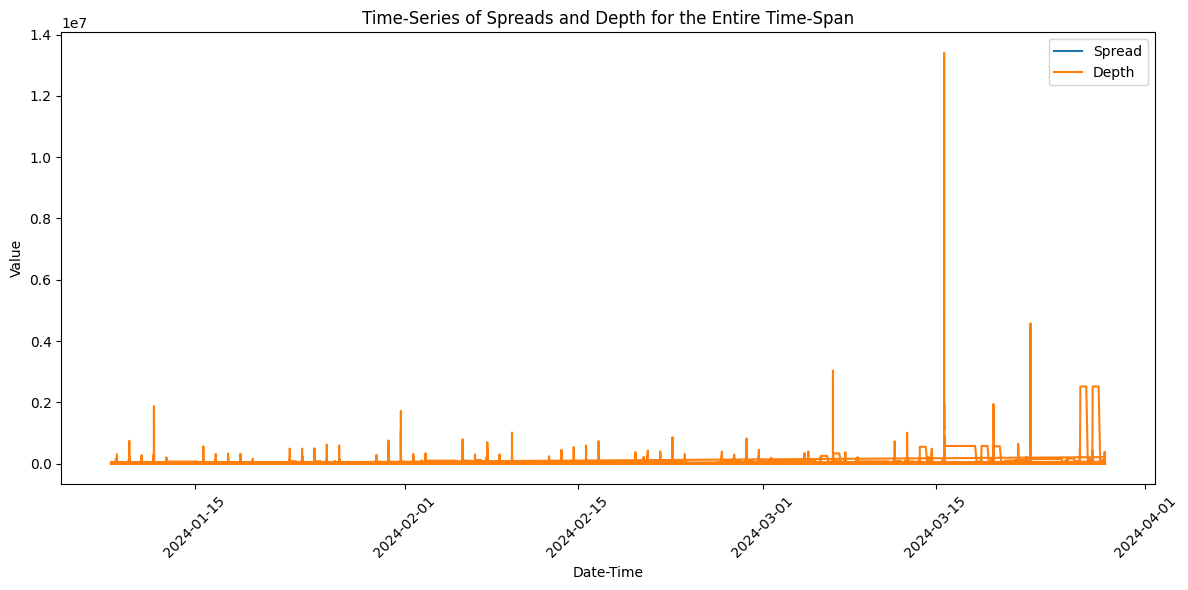

In [15]:
import matplotlib.pyplot as plt

# Plot time-series of spreads and depth
plt.figure(figsize=(12, 6))
plt.plot(all_data['Date-Time'], all_data['spread'], label='Spread')
plt.plot(all_data['Date-Time'], all_data['depth'], label='Depth')
plt.title('Time-Series of Spreads and Depth for the Entire Time-Span')
plt.xlabel('Date-Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


In [16]:
# Calculate summary statistics for spreads and depth for the entire time-span for each stock
summary_stats = {}
for stock in selected_stocks:
    stock_data = data[data['Stock'] == stock]
    
    # Calculate mid, spread, and depth
    stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
    stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
    stock_data['depth'] = 0.5 * (stock_data['Close Ask Size'] + stock_data['Close Bid Size'])

    # Filter out rows with non-positive spread
    stock_data = stock_data[stock_data['spread'] > 0]

    # Calculate summary statistics
    spread_stats = stock_data['spread'].describe()
    depth_stats = stock_data['depth'].describe()

    # Store summary statistics
    summary_stats[stock] = {
        'Mean Spread': spread_stats['mean'],
        'Std Dev Spread': spread_stats['std'],
        'Min Spread': spread_stats['min'],
        'Max Spread': spread_stats['max'],
        'Median Spread': spread_stats['50%'],
        'Mean Depth': depth_stats['mean'],
        'Std Dev Depth': depth_stats['std'],
        'Min Depth': depth_stats['min'],
        'Max Depth': depth_stats['max'],
        'Median Depth': depth_stats['50%']
    }

# Convert summary statistics to DataFrame for easier visualization
summary_stats_df = pd.DataFrame(summary_stats).transpose()
print("Summary Statistics for Spreads and Depth for the Entire Time-Span:")
print(summary_stats_df)


Summary Statistics for Spreads and Depth for the Entire Time-Span:
        Mean Spread  Std Dev Spread  Min Spread   Max Spread  Median Spread   
GSK.L      4.840350       39.216976    1.164483  3021.207178       2.418380  \
MKS.L     17.634668      146.803182    3.442933  3032.629559       8.264463   
TSCO.L     8.411079       53.638869    3.297609  1733.524355       3.643651   

         Mean Depth  Std Dev Depth  Min Depth  Max Depth  Median Depth  
GSK.L    978.083931    1933.580493       10.0    62359.0         689.0  
MKS.L   3455.224525    3498.957253        5.5   177570.5        2832.5  
TSCO.L  8744.685682    6193.759232       94.0   215544.0        7580.5  


/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/3125322287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/3125322287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/3125322287

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407

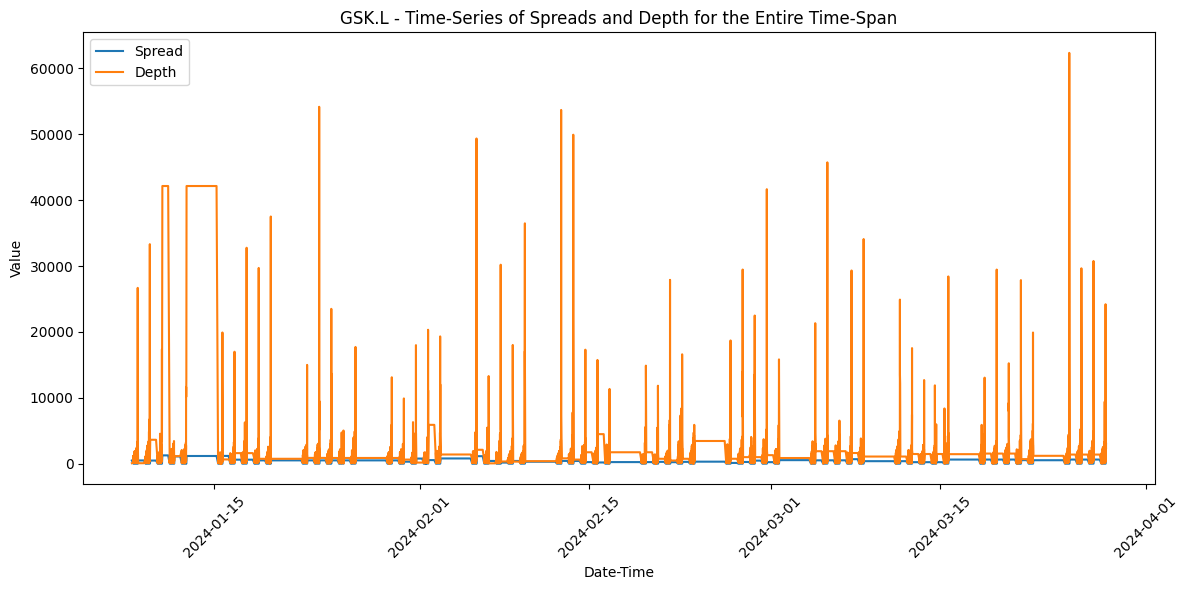

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407

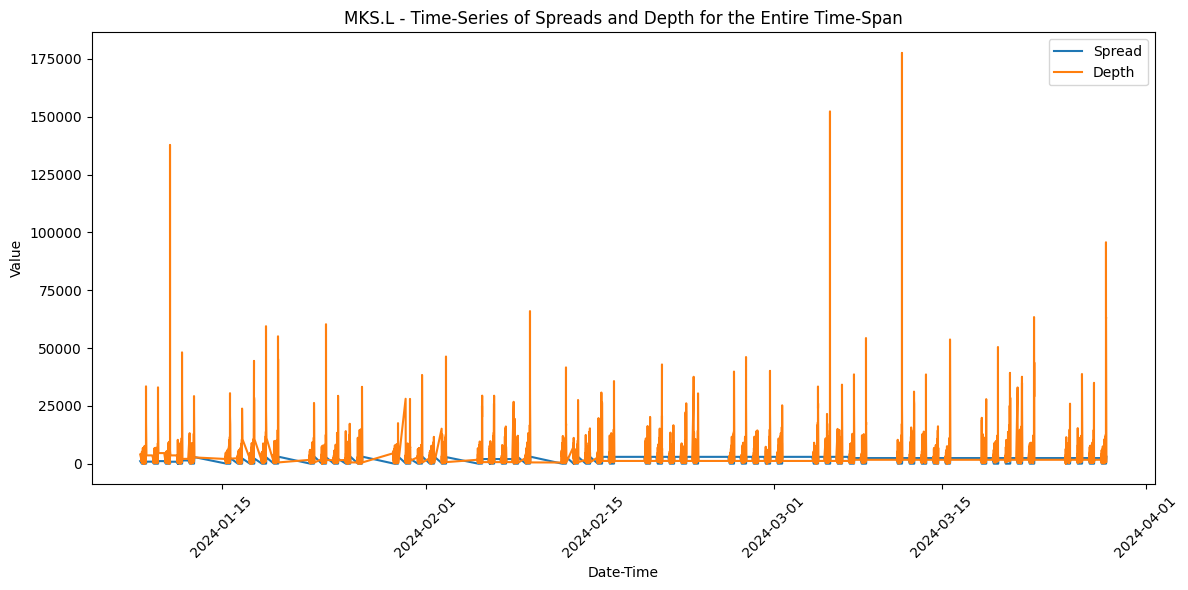

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_52613/2975327407

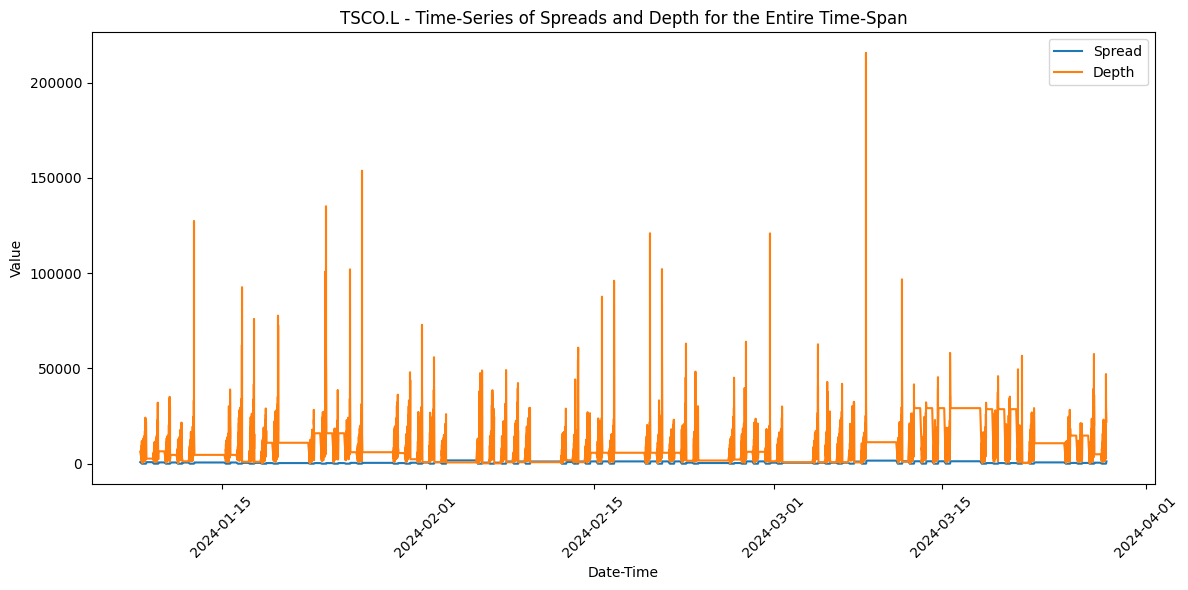

In [17]:
# Plot time-series of spreads and depth for each stock
for stock in selected_stocks:
    stock_data = data[data['Stock'] == stock]
    stock_data['mid'] = 0.5 * (stock_data['Close Bid'] + stock_data['Close Ask'])
    stock_data['spread'] = 10000 * (stock_data['Close Ask'] - stock_data['Close Bid']) / stock_data['mid']
    stock_data['depth'] = 0.5 * (stock_data['Close Ask Size'] + stock_data['Close Bid Size'])
    stock_data = stock_data[stock_data['spread'] > 0]
    
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date-Time'], stock_data['spread'], label='Spread')
    plt.plot(stock_data['Date-Time'], stock_data['depth'], label='Depth')
    plt.title(f'{stock} - Time-Series of Spreads and Depth for the Entire Time-Span')
    plt.xlabel('Date-Time')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()


In [18]:
# Calculate mean spread and depth measures for each hour of the day for each stock
hourly_stats = data.groupby([data['Date-Time'].dt.hour, 'Stock']).agg({'spread': 'mean', 'depth': 'mean'}).unstack()

# Plot mean spread and depth measures for each hour of the day for each stock
hourly_stats.plot(kind='line', figsize=(12, 6))
plt.title('Mean Spread and Depth Measures for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.xticks(range(24))
plt.legend(title='Stock')
plt.tight_layout()
plt.show()
plt.close()


KeyError: "Column(s) ['depth', 'spread'] do not exist"

In [11]:
for stock in selected_stocks:
    stock_data = data[data['Stock'] == stock]

    # Calculate daily average spreads, depth, and midquote volatility
    daily_avg = stock_data.resample('D', on='Date-Time').mean()
    daily_spread = daily_avg['spread']
    daily_depth = daily_avg['depth']
    daily_midquote = daily_avg['mid']
    daily_volatility = stock_data.resample('D', on='Date-Time')['mid'].std()

    # Plot the resulting daily spread, depth, and volatility series
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spread, label='Daily Average Spread')
    plt.plot(daily_depth, label='Daily Average Depth')
    plt.plot(daily_volatility, label='Daily Midquote Volatility')
    plt.title(f'Daily Average Spread, Depth, and Volatility Series for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()


TypeError: Could not convert BDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.LBDEV.L to numeric